<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/XGBoost_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조 : 
https://lsjsj92.tistory.com/547
https://lsjsj92.tistory.com/548


# XGBoost_Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

## data 준비

In [6]:
data = load_breast_cancer()
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [7]:
# data frame 생성
cancer = pd.DataFrame(data.data, columns = data.feature_names)
cancer['target'] = data.target
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
# Train - Test split
y = cancer['target']
X = cancer.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [19]:
# XGBClassfier 기본형
xgb = XGBClassifier(n_estimators = 500, learning_rate= 0.1, max_depth = 4)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9736842105263158


## hyper_parameters

n_estimators : 결정 트리의 개수  
max_depth : 트리의 깊이  
learning_rate : 학습률  
min_split_loss : 리프 노드를 추가로 나눌 것인가  
reg_lambda : L2규제  
reg_alpha : L1규제  

In [10]:
# GridSearchCV 활용
xgb = XGBClassifier()

xgb_params = {
    'n_estimators' : [50, 100, 200, 300],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.5],
    'max_depth' : [4, 6, 8, 10]
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_params, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100,

In [11]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9736263736263737
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


# LightGBM

In [13]:
!pip install lightgbm
from lightgbm import LGBMClassifier, plot_importance

In [15]:
lgb = LGBMClassifier(n_estimators = 400)
lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9736842105263158


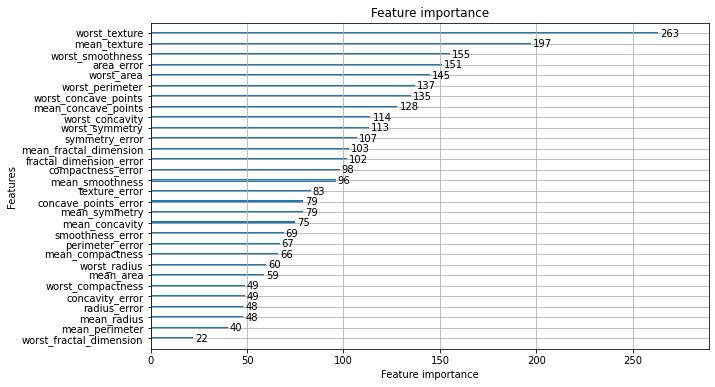

In [17]:
fig, ax = plt.subplots(figsize = (10, 6))
plot_importance(lgb, ax = ax)